<a href="https://colab.research.google.com/github/SandeepChatterjee66/NLP-Workshop24/blob/main/PyTorch-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

**Import necessary libraries:**
* **torch:** Provides tensor data type and efficient implementation of operations on them
* **torch.nn:** Defines neural network layers and modules.
* **torch.optim:** Implements optimization algorithms like SGD, Adam, etc.


In [2]:
a = [1,2,3]

In [4]:
x = torch.tensor(a)
y = torch.tensor([4,5,6])

In [5]:
x + y

tensor([5, 7, 9])

hadamard multiplication

In [6]:
x * y

tensor([ 4, 10, 18])

Matrix Multiplication

In [8]:
# Create two random matrices
m1 = torch.randn(2, 3)
m2 = torch.randn(3, 4)

# Multiply the matrices
m1 @ m2

tensor([[-0.0599, -0.7494,  0.4511,  0.0483],
        [-0.0431, -1.9795,  0.5308,  0.0390]])

#### A basic Multi Layer Perceptron

In [9]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(3, 5)
    self.fc2 = nn.Linear(5, 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [10]:
model = SimpleNN()
model

SimpleNN(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [11]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

Mean Squared Error (MSE) measures the average squared difference between predicted and actual values
why Squaring them ? because, Squaring the error eliminates negative values and amplifies larger errors, making the optimization process more sensitive to significant deviations

In [14]:
input_data = torch.tensor([[1.0,2.0,3.0],[4.0,5,6],[7.0,8,9]])
target_data = torch.tensor([[10.0], [20], [30]])

In [15]:
input_data

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [16]:
target_data

tensor([[10.],
        [20.],
        [30.]])

In [19]:
epochs = 10
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(input_data)
  loss = criterion(outputs, target_data)
  loss.backward()
  optimizer.step()
  if(epoch+1)%2==0:
    print(f"epoch [{epoch+1}/{epochs}], loss : {loss.item():.4f}")

epoch [2/10], loss : 66.6667
epoch [4/10], loss : 66.6667
epoch [6/10], loss : 66.6667
epoch [8/10], loss : 66.6667
epoch [10/10], loss : 66.6667


### **Sentiment analysis with pytorch**

Sentiment analysis is the task of classifying the emotional tone of a given text, as positive, negative, or neutral.

In [21]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from datasets import load_dataset
import gensim.downloader as api

In [41]:
# let's download pre-trained word embedding

Word embeddings represent words as dense vectors in a high-dimensional space, capturing semantic and syntactic relationships. 1  They are trained on large text corpora using techniques like Word2Vec or GloVe by optimizing a loss function that encourages similar words to have nearby vectors. The values in each dimension don't have direct interpretations but collectively encode the word's meaning and context within the vector space

In [23]:
def load_word2vec_model():
  wmodel = api.load("word2vec-google-news-300")
  print("done word2vec")
  return wmodel

word2vec_model  = load_word2vec_model()

[==================================================] 100.0% 1662.8/1662.8MB downloaded
done word2vec


A tokenizer breaks down text into smaller units (tokens) like words, subwords, or characters, making it suitable for machine learning models

In [24]:
import nltk
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

This function takes in a sentence and converts it into a single vector of 300 dimensions after cleaning

In [25]:
def text_to_embedding(text, model):
  cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text.lower())
  tokens = word_tokenize(cleaned_text)
  embeddings = [model[word] for word in tokens if word in model]
  return np.mean(embeddings, axis=0) if embeddings else np.zeroes(model.vector_size)

In [45]:
text_to_embedding("i am good", word2vec_model)

array([-0.11735026, -0.0078125 ,  0.0435791 ,  0.08544922,  0.00106176,
        0.05177816, -0.02478027,  0.03033447,  0.06461588,  0.08056641,
       -0.03566488, -0.11425781, -0.01570638, -0.07128906, -0.04793294,
        0.08919271,  0.06486002,  0.18929036,  0.10400391, -0.05533854,
       -0.14729817,  0.09505209,  0.13289388,  0.07340495,  0.03792318,
        0.13069661, -0.22184245, -0.0394694 ,  0.09330241, -0.07061768,
        0.08268229, -0.03306071, -0.02563477, -0.11328125,  0.0546875 ,
        0.19335938, -0.08870443,  0.07271322, -0.09114584,  0.03857422,
        0.17425537, -0.11458334,  0.22786458,  0.05210368,  0.08072916,
        0.07324219,  0.03255208, -0.01220703, -0.03092448, -0.10205078,
        0.08654785,  0.15218098,  0.03279622,  0.14860027,  0.01888021,
        0.13216145, -0.0538737 , -0.04882812, -0.00032552, -0.13435872,
       -0.00537109,  0.13063557, -0.2491862 , -0.04353841,  0.05940755,
       -0.11132812, -0.03100586,  0.1336263 , -0.14292145,  0.02

#### dataset - IMBD movie review

In [26]:
dataset = load_dataset("imdb", split='train')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Preparing the data

In [27]:
X = np.array([text_to_embedding(text, word2vec_model) for text in dataset['text']])
y = np.array(dataset['label'])

In [28]:
# Fix issue with converting labels to integers
y = y.astype(int)


# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)


# Create DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

Using device: cuda


In [46]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

Preparing the model

In [47]:
# 4. Define MLP Model
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 2)  # Binary classification (positive/negative)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

In [30]:
# Instantiate model and move it to the GPU
model = MLPModel(input_dim=X_train.shape[1]).to(device)
print(model)  # This will print out the architecture of the neural network
from torchsummary import summary
summary(model, (X_train.shape[1],))  # Show model architecture summary

MLPModel(
  (fc1): Linear(in_features=300, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          38,528
              ReLU-2                  [-1, 128]               0
            Linear-3                    [-1, 2]             258
           Softmax-4                    [-1, 2]               0
Total params: 38,786
Trainable params: 38,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


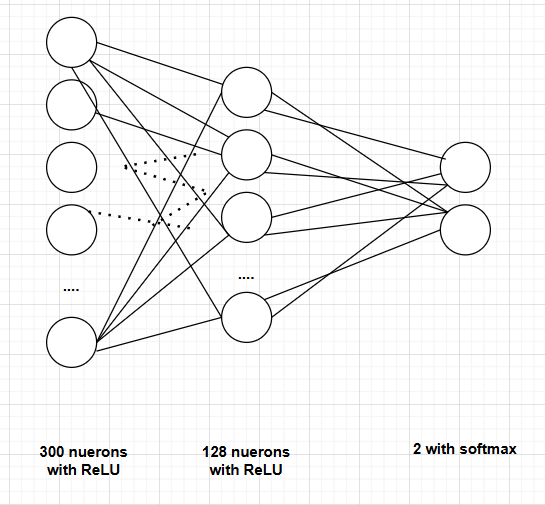

In [33]:
# 6. Train the model and plot the loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))


    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))


    print(f"Epoch [{epoch+1}/10], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

Epoch [1/10], Training Loss: 0.5862, Validation Loss: 0.5079
Epoch [2/10], Training Loss: 0.4906, Validation Loss: 0.4826
Epoch [3/10], Training Loss: 0.4746, Validation Loss: 0.4726
Epoch [4/10], Training Loss: 0.4665, Validation Loss: 0.4674
Epoch [5/10], Training Loss: 0.4617, Validation Loss: 0.4637
Epoch [6/10], Training Loss: 0.4595, Validation Loss: 0.4644
Epoch [7/10], Training Loss: 0.4568, Validation Loss: 0.4625
Epoch [8/10], Training Loss: 0.4544, Validation Loss: 0.4622
Epoch [9/10], Training Loss: 0.4530, Validation Loss: 0.4592
Epoch [10/10], Training Loss: 0.4524, Validation Loss: 0.4642


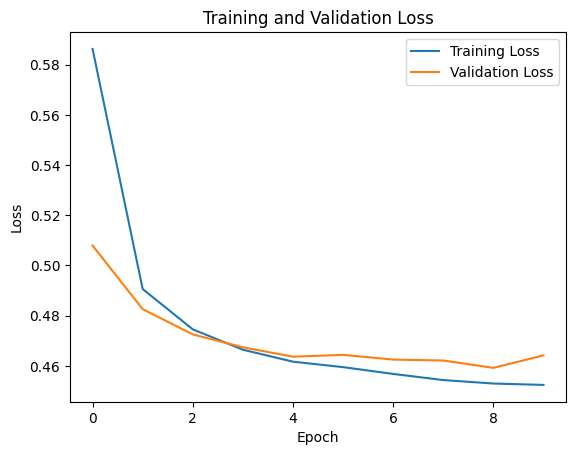

In [35]:
# 7. Plot the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [36]:

# 8. Save and load the model
torch.save(model.state_dict(), 'sentiment_model.pth')  # Save model
print("Model saved!")


# Load the model
loaded_model = MLPModel(input_dim=X_train.shape[1]).to(device)
loaded_model.load_state_dict(torch.load('sentiment_model.pth'))
loaded_model.eval()

Model saved!


<ipython-input-36-94ceb0b944ed>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('sentiment_model.pth'))


MLPModel(
  (fc1): Linear(in_features=300, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

check here
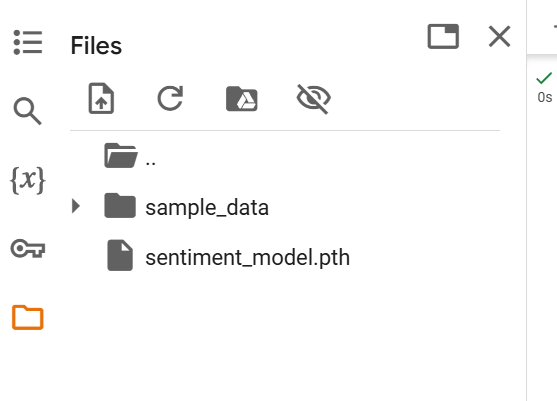

Testing the model with example inputs

**try changing examples here, by typing own examples,
and see if you can fool model to predict a bad review to be positive and good review to be negative**

In [37]:
# 9. Test on sample inputs
sample_reviews = [
    "They looked quite wonderful, it was thrilling",
    "It was a waste of time. Totally boring and predictable."
]


# Convert the sample reviews to embeddings
sample_reviews_embeddings = np.array([text_to_embedding(review, word2vec_model) for review in sample_reviews])
sample_reviews_tensor = torch.tensor(sample_reviews_embeddings, dtype=torch.float32).to(device)


with torch.no_grad():
    outputs = loaded_model(sample_reviews_tensor)
    predicted_labels = torch.argmax(outputs, dim=1)
    for review, label in zip(sample_reviews, predicted_labels):
        sentiment = "Positive" if label == 1 else "Negative"
        print(f"Review: {review}\nSentiment: {sentiment}\n")

Review: They looked quite wonderful, it was thrilling
Sentiment: Positive

Review: It was a waste of time. Totally boring and predictable.
Sentiment: Negative



In [40]:
# 10. Evaluate the model on the test dataset
# Assuming you have a test dataset
# If not, you can split the data as test dataset or use part of the validation dataset

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Example: Using the validation set as a "test" dataset (just for demonstration)
test_loader = DataLoader(val_data, batch_size=64, shuffle=False)


# Predictions and True Labels
predictions = []
true_labels = []


model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
        predictions.extend(predicted.cpu().numpy())  # Move to CPU for evaluation
        true_labels.extend(labels.cpu().numpy())  # Move to CPU for evaluation

# Compute Evaluation Metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='binary')
recall = recall_score(true_labels, predictions, average='binary')
f1 = f1_score(true_labels, predictions, average='binary')


# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(true_labels, predictions))

Accuracy: 0.8422
Precision: 0.8922
Recall: 0.7763
F1-Score: 0.8302

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2515
           1       0.89      0.78      0.83      2485

    accuracy                           0.84      5000
   macro avg       0.85      0.84      0.84      5000
weighted avg       0.85      0.84      0.84      5000



Accuracy: Overall correctness of predictions.
Precision: How often correct positive predictions are made.
Recall: How often actual positive cases are correctly identified.

Confusion matrix and F1-score:

Confusion matrix: Provides a detailed breakdown of correct and incorrect predictions, helping identify specific error patterns.

F1-score: Balances precision and recall, giving a more comprehensive evaluation, especially in imbalanced datasets.

### Congratulations! you have trained a very simple model to perform sentiment analysis